In [14]:
import os
import json
PATH = 'results'
here = os.getcwd().replace('\\','/')
target_folder = '/'.join((here,PATH))
files = [file for file in os.listdir(target_folder) if file.endswith('.json')]
for file in files:
    print(file)
    file_path = '/'.join((target_folder,file))
    with open(file_path)as f:
        data = json.load(f)
    print(data)

2023-09-20 17-37-11.json
{'by_agent': {'n_step_sarsa_agent': {'bombs': 107, 'coins': 17, 'crates': 200, 'invalid': 21, 'kills': 1, 'moves': 2637, 'rounds': 10, 'score': 22, 'steps': 3095, 'suicides': 2, 'time': 28.044756174087524}, 'rule_based_agent_0': {'bombs': 145, 'coins': 27, 'crates': 332, 'invalid': 56, 'kills': 1, 'moves': 1297, 'rounds': 10, 'score': 32, 'steps': 1502, 'suicides': 9, 'time': 3.6620190143585205}, 'rule_based_agent_1': {'bombs': 220, 'coins': 29, 'crates': 341, 'invalid': 69, 'kills': 2, 'moves': 2577, 'rounds': 10, 'score': 39, 'steps': 2880, 'suicides': 3, 'time': 8.607664585113525}, 'rule_based_agent_2': {'bombs': 187, 'coins': 15, 'crates': 314, 'invalid': 55, 'kills': 5, 'moves': 2167, 'rounds': 10, 'score': 40, 'steps': 2425, 'suicides': 5, 'time': 7.094658851623535}}, 'by_round': {'Round 01 (2023-09-20 17-36-17)': {'coins': 9, 'kills': 2, 'steps': 400, 'suicides': 1}, 'Round 02 (2023-09-20 17-36-24)': {'coins': 9, 'kills': 1, 'steps': 400, 'suicides': 1},

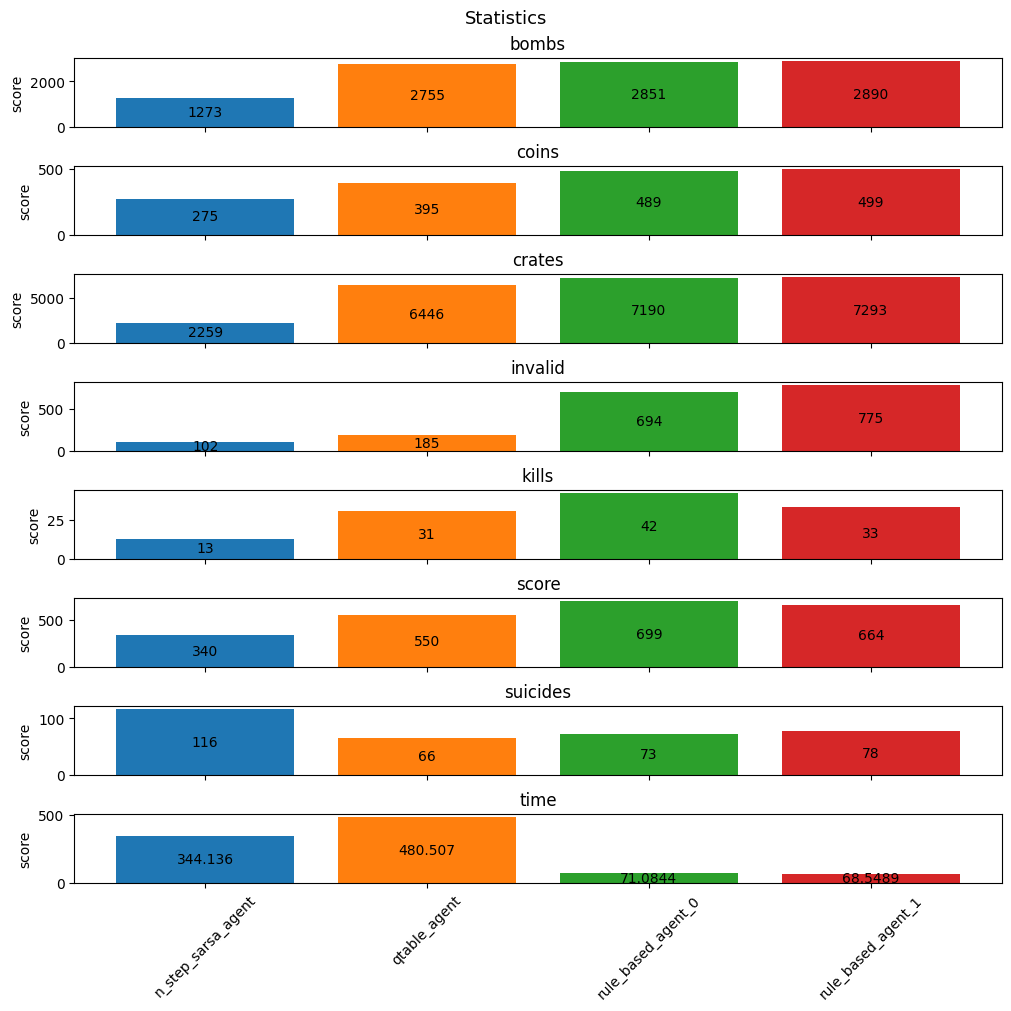

In [15]:
from matplotlib import pyplot as plt
agents = data['by_agent']

def performance_plot(agents):
    # TODO : maybe we also want the number of wins
    plot_keys = ['bombs', 'coins', 'crates', 'invalid', 'kills', 'score', 'suicides', 'time']
    fig, axs = plt.subplots(len(plot_keys), sharex=True, figsize=(10,10), layout="constrained")
    fig.suptitle('Statistics',size=13)
    axs = axs.flatten()
    for key, ax in zip(plot_keys, axs):
        ax.set_title(key)
        ax.set_ylabel('score')
        try: 
            for agent_name in agents.keys():
                agent = agents[agent_name]
                stat = agent[key]
                p = ax.bar(agent_name, stat, label=str(stat))
                ax.bar_label(p, label_type="center")
        except:
            continue
    plt.xticks(rotation=45)

performance_plot(agents)
plt.savefig(file_path.replace('.json', '.png'), bbox_inches='tight')
            


In [ ]:
data['by_round']

In [ ]:
import pandas as pd
import numpy as np
file = 'round1.pkl'
data = pd.read_pickle(file)
print(data.columns)
data.head(10)

In [ ]:
data['field'][0]

In [ ]:
data['bombs'][4]

In [ ]:
def get_blast_coords(x, y, field, power=3):
        blast_coords = [(x, y)]

        for i in range(1, power + 1):
            if field[x + i, y] == -1:
                break
            blast_coords.append((x + i, y))
        for i in range(1, power + 1):
            if field[x - i, y] == -1:
                break
            blast_coords.append((x - i, y))
        for i in range(1, power + 1):
            if field[x, y + i] == -1:
                break
            blast_coords.append((x, y + i))
        for i in range(1, power + 1):
            if field[x, y - i] == -1:
                break
            blast_coords.append((x, y - i))

        return blast_coords

In [ ]:
get_blast_coords(15,14,data['field'][0])

In [ ]:
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder

field = data['field'][3].copy()
bombs = data['bombs'][3].copy()
print(bombs)

field[field==1] = 2
field[field==0] = 1

grid = Grid(matrix=field)
start = grid.node(1, 1)
end_bombs = [grid.node(bomb[0][0],bomb[0][1]) for bomb in bombs]


finder = AStarFinder()
for (end,bomb) in zip(end_bombs, bombs):
    path, runs = finder.find_path(start, end, grid)
    bomb_timer = bomb[1]
    print(len(path),bomb_timer+2)
    
    if len(path)<=bomb_timer+2:
        for pos in get_blast_coords(end.x, end.y,field):
            field [pos[0],pos[1]] =-1
    grid.cleanup()

#print(field.T[::-1])
grid = Grid(matrix=field)
start = grid.node(1, 1)
end = grid.node(12,3)

finder = AStarFinder()

path, runs = finder.find_path(start, end, grid)
print('operations:', runs, 'path length:', len(path))
print(grid.grid_str(path=path, start=start, end=end))

In [ ]:
field = data['field'][3].copy()
field[field==1] = 2
field[field==0] = 1

grid = Grid(matrix=field)
start = grid.node(1, 1)
end = grid.node(12,13)

finder = AStarFinder()

path, runs = finder.find_path(start, end, grid)
print('operations:', runs, 'path length:', len(path))
print(grid.grid_str(path=path, start=start, end=end))

In [ ]:
for i, row in enumerate(data):
    i = 50
    agents = data.iloc[i]['agents']
    bombs = data.iloc[i]['bombs']
    coins = data.iloc[i]['coins']
    number_expl_map = np.count_nonzero(data.iloc[i]['explosion_map'])
    explosions = np.transpose(np.nonzero(data.iloc[i]['explosion_map']))
    
    for agent in agents:
        print(agent)
        pos_agent = agent[3]
        print(pos_agent)
        break
    break

21.08.23


In [ ]:
cd ..

In [ ]:
cd 2023-08-21_18-01-15-556240

In [ ]:
game_state = pd.read_pickle('round1.pkl')
print(game_state.head(2))
game_state['coins'][0]

In [ ]:
game_state['agents'][0][0][3]

In [ ]:
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder

def find_ideal_path(pos_agent, pos_coin, field=None, bombs=None, explosion_map=None):
    
    field[field==1] = 2
    field[field==0] = 1
    grid = Grid(matrix=field)
    finder = AStarFinder()

    sx, sy = pos_agent
    start = grid.node(sx, sy)

    lengths = []
    for coin in pos_coin:
        cx, cy = coin
        end = grid.node(cx,cy)
        path, runs = finder.find_path(start, end, grid)
        grid.cleanup()
        lengths.append((len(path),path))

    print('operations:', runs, 'path length:', len(path))
    print(grid.grid_str(path=path, start=start, end=end))

    lengths = sorted(lengths,key=lambda c : c[0])
    step0 = lengths[0][1][0]
    step1 = lengths[0][1][1]

    diff = np.array([step1.x,step1.y]) - np.array([step0.x,step0.y])

    if diff[0]==0:
        if diff[1]==1:
            move = 'UP'
        else:
            move = 'DOWN'

    elif diff[0]==1:
        move = 'RIGHT'
    else:
        move = 'LEFT'

    return move



field = data['field'][0].copy()
bombs = data['bombs'][0].copy()
pos_agent = game_state['agents'][0][0][3]
positions_coins = game_state['coins'][0]

step0,step1 =find_ideal_path(pos_agent, positions_coins, field)



In [ ]:

pos_agent,step0, step1